In [1]:
from plotting_routines import generate_filename_fRG, change_prefix, plot_fRG
import numpy as np
import matplotlib.pyplot as plt
import h5py

path_fRG = "../Data/"
path_NRG = path_fRG

ea = "error_analysis_"
PC = "parquet_check_"

In [2]:
def generate_label(filenames):
    labels = [] 
    
    for filename in filenames:
        diag_class = filename[len(path_fRG)+1]
        label = r'$\mathcal{K}_' + diag_class
        if (filename[len(path_fRG)+14 : len(path_fRG)+20] == 'static'):
            label += '\mathrm{-sf}'
        
        elif(diag_class == str(2)):
            label += '\mathrm{-' + filename[len(path_fRG)+3] + 'L}'
            
        label += '$'
        labels.append(label)
    return labels

In [3]:
def add_PC_to(labels):
    PC_labels = []
    for label in labels:
        s = list(label)
        s.insert(1, '\mathrm{PC}_{')
        s.insert(-1, '}')
        PC_labels.append("".join(s))
        
    return PC_labels

In [4]:
K1    = generate_filename_fRG(path_fRG, 1,1)
K1_sf = generate_filename_fRG(path_fRG, 1,1, sf=True)
K2_1L = generate_filename_fRG(path_fRG, 2,1)
K2_2L = generate_filename_fRG(path_fRG, 2,2, Gamma=1./3.)

K1_PC    = change_prefix(path_fRG, PC, K1)
K2_1L_PC = change_prefix(path_fRG, PC, K2_1L)
K2_2L_PC = change_prefix(path_fRG, PC, K2_2L)

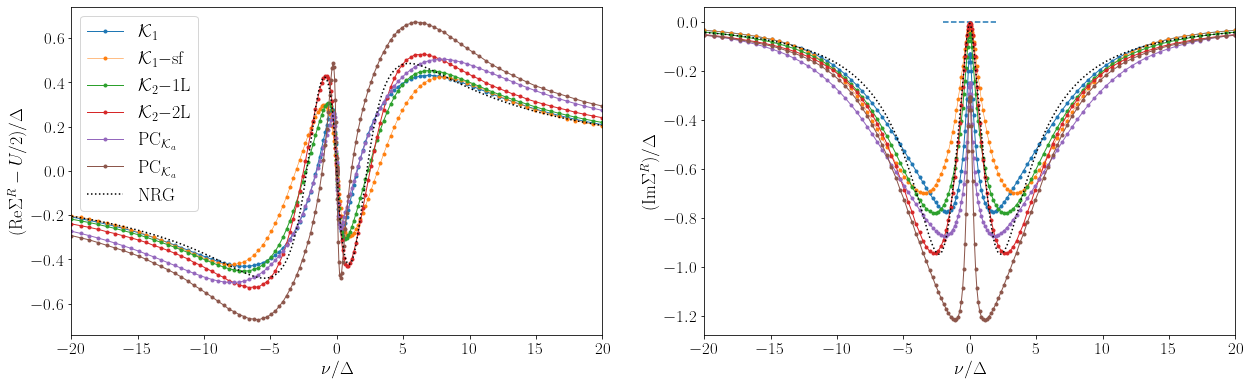

In [5]:
U_NRG = 2
filenames = [K1, K1_sf, K2_1L, K2_2L]
PC_filenames = [K1_PC, K2_1L_PC]#, K2_2L_PC]

labels = generate_label(filenames)
PC_labels = add_PC_to(generate_label(PC_filenames))

filenames += PC_filenames
labels += PC_labels


typ = "self"
iK = 0

NRG_info = [U_NRG, path_NRG]

fig, ax = plot_fRG(typ, iK, filenames, labels, NRG_info)

Delta = 0.5


plt.show()
fig.savefig(typ + str(U_NRG/Delta)+".pdf")

In [ ]:
with h5py.File("../Data/SIAM_NRG.h5", 'r') as f:
    print(f.keys())

In [ ]:
print(typ[0:7])